### Setup

In [1]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
   Installed LZO_jll ── v2.10.2+1
   Installed FFTW_jll ─ v3.3.10+1
  No Changes to `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Project.toml`
    Updating `C:\Users\domin\OneDrive\Desktop\Julia Files\Dragoon.jl\Manifest.toml`
  [f5851436] ↑ FFTW_jll v3.3.10+0 ⇒ v3.3.10+1
  [dd4b983a] ↑ LZO_jll v2.10.2+0 ⇒ v2.10.2+1
Precompiling project...
  ✓ LZO_jll
  ✓ FFTW_jll
  ✓ Accessors → AccessorsStaticArraysExt
  ✓ Cairo_jll
  ✓ HarfBuzz_jll
  ✓ Accessors → AccessorsUnitfulExt
  ✓ libass_jll
  ✓ Pango_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ FFTW
  ✓ GR
  ✓ BoostFractor
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  17 dependencies successfully precompiled in 101 seconds. 214 already precompiled. 1 skipped during auto due to previous errors.


In [61]:
using Dragoon
using Plots, Plots.Measures
using Dates
using HDF5, DataFrames

include("analysis/tools/tools.jl");

In [60]:
@load "full_20_24.0.jld2"

In [32]:
n = 20 # number of discs in the booster

f = 20

freqs = genFreqs(f*1e9+25e6,50e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(f*1e9+25e6,150e6; n=1000) # plot with these frequencies

booster = AnalyticalBooster(P0[f])  # physical properties of the booster

obj = ObjAnalytical

hist = initHist(booster,2*(booster.ndisk^2),freqs,obj);

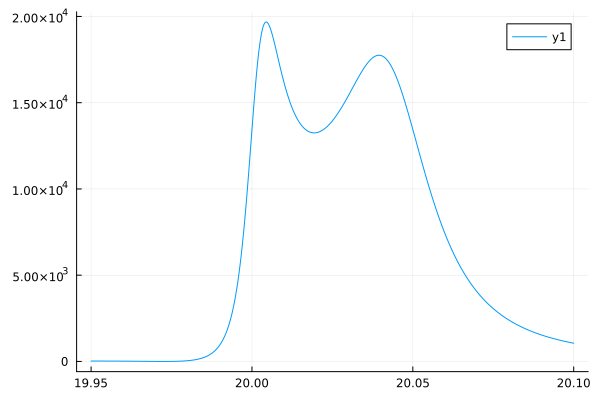

In [33]:
p0 = copy(booster.pos)

plot(freqsplot/1e9,getBoost1d(booster,freqsplot))

In [34]:
move(booster,p0; additive=false)

t1 = copy(booster.timestamp)
O,P,F,s,s_ = dragoon(booster,hist,50e6,5e6,
        obj,UnstuckExpand(2,6_000);
        fmin=f*1e9,fmax=40.0e9,nfreqs=10,
        scalerange=(1.0,1.3),scalesteps=1000,
        preoptimize=false,reverse=false)

t2 = copy(booster.timestamp)
println("Elapsed movement time: ",canonicalize(t2-t1))

f0 = [(f[1]+f[end])/2 for f in F];

25 seconds, 862 milliseconds

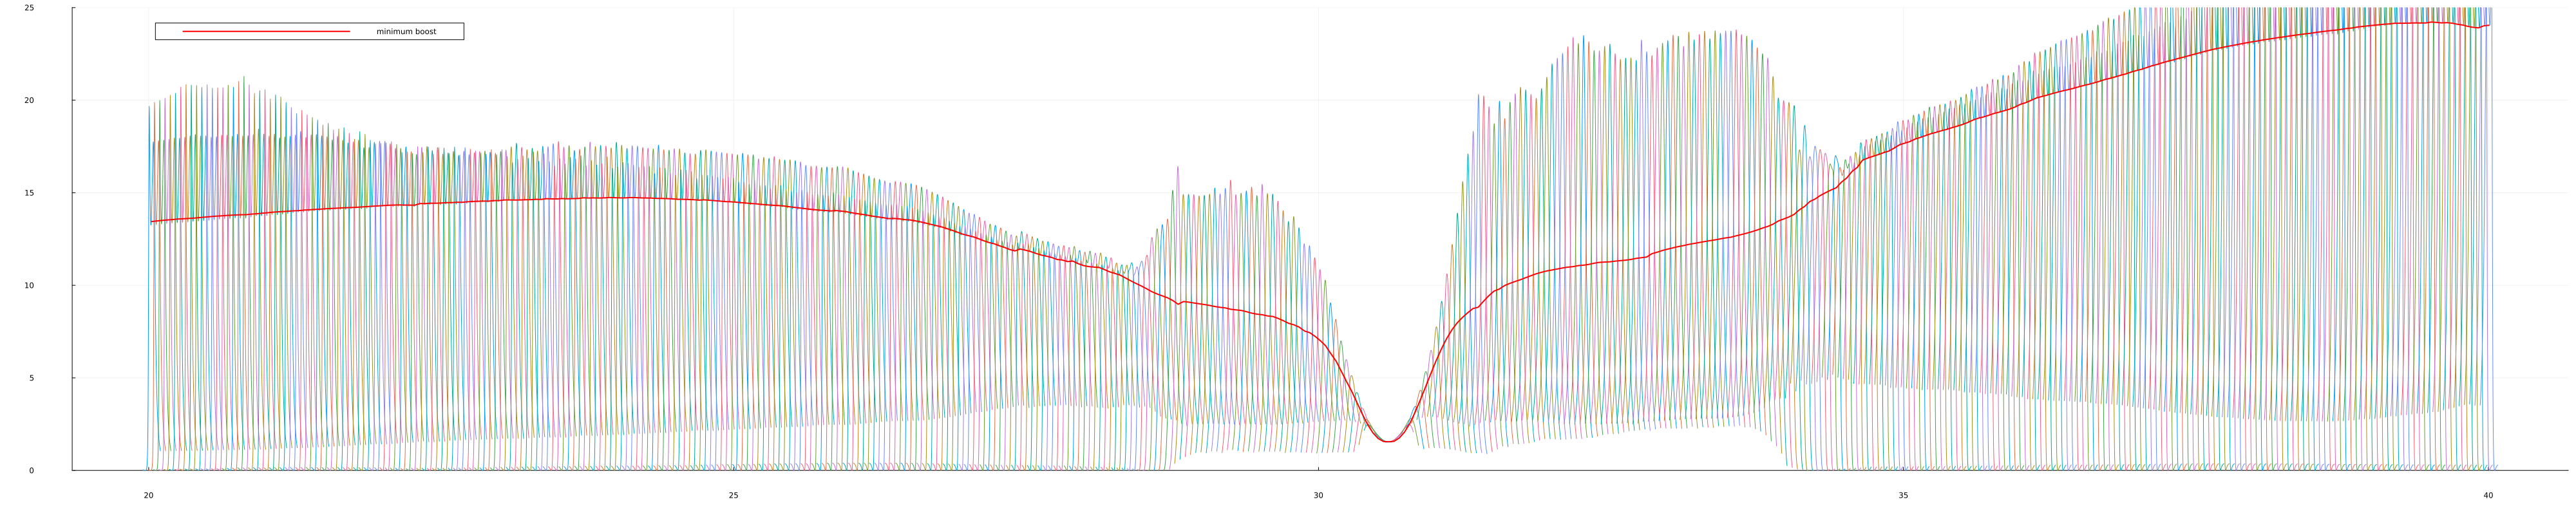

In [36]:
p1 = plot(; xlabel="Frequency [GHz]",ylabel="Boostfactor β² × 10³",size=(4000,800),
    left_margin=[10mm 0mm],bottom_margin=[10mm 0mm])
p2 = plot(; xlabel="Frequency [GHz]",ylabel="Boostfactor β² × 10³",size=(4000,800),
    left_margin=[10mm 0mm],bottom_margin=[10mm 0mm])

for i in eachindex(P)
    bw = F[i][end]-F[i][1]
    f = collect(range(F[i][1]-bw,F[i][end]+bw,100))
    b = boost1d(pos2dist(P[i]),f)
    plot!(p,f/1e9,b/1e3,label="")
end
# xlims!(p,(20-0.1,22+0.1))
ylims!(p,(0,25))

plot!(p,f0/1e9,-O/1e3; c=:red,lw=2,label="minimum boost")
p

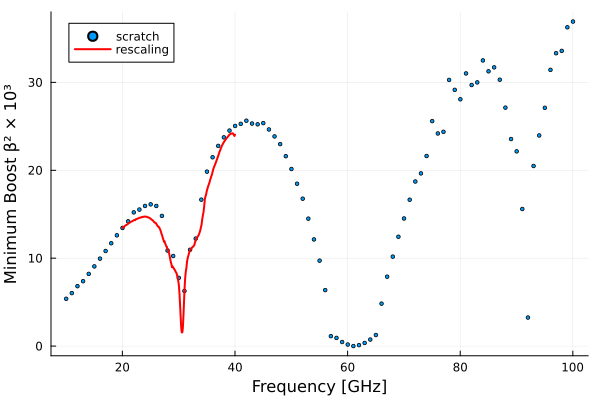

In [54]:
p3 = plot(collect(10:1:100).+0.025,-O0/1e3,label="scratch",seriestype=:scatter,
    xlabel="Frequency [GHz]",ylabel="Minimum Boost β² × 10³",markersize=2)

plot!(p3,f0/1e9,-O/1e3; label="rescaling",c=:red,lw=2)

In [57]:
O0[13]

-15212.865941379783

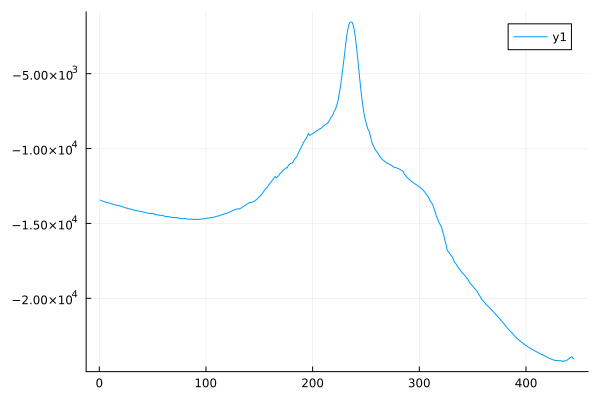

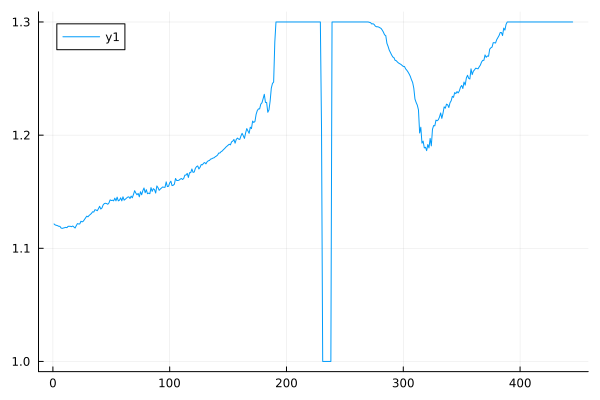

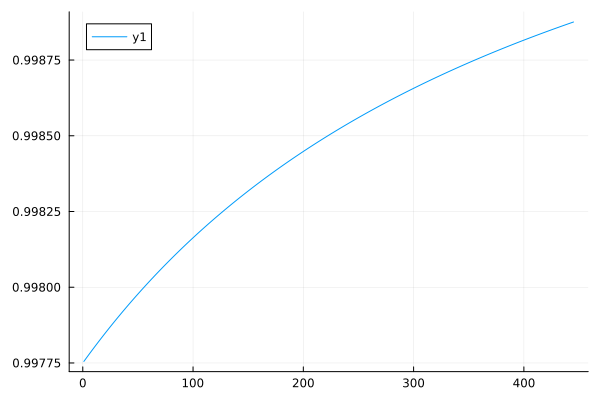

In [37]:
display(plot(s_))
display(plot(s))